In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('./test.csv',encoding='euc-kr')
df

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,여,INFJ,800,0,0,800,0,학원,자연과학계열,1
214,215,남,ENTP,800,0,0,0,950,독학,사회계열,1
215,216,남,ENTP,800,0,0,0,850,독학,사회계열,0
216,217,여,INFJ,800,0,700,0,0,학원,자연과학계열,1


In [3]:
df.columns
s = ['toeic', 'teps', 'toeic_sp', 'opic']
for e in s:
    for i in range(len(df)):
        if df[e][i] > 0 :
            df[e][i] = 1
        else :
            df[e][i] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_14212\3687464101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_14212\3687464101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 0


In [4]:
df

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,1,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,1,0,0,1,독학,공과계열,1
2,3,여,INFP,750,0,0,1,0,학원,인문계열,1
3,4,남,ESTP,850,1,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,1,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,여,INFJ,800,0,0,1,0,학원,자연과학계열,1
214,215,남,ENTP,800,0,0,0,1,독학,사회계열,1
215,216,남,ENTP,800,0,0,0,1,독학,사회계열,0
216,217,여,INFJ,800,0,1,0,0,학원,자연과학계열,1


In [5]:
co=df['major'].unique()
gdf = df.groupby('major')[['toeic','teps','toeic_sp','opic']].sum()
gdf = gdf.T.copy()
gdf

major,공과계열,사회계열,상경계열,인문계열,자연과학계열
toeic,25,16,24,36,15
teps,24,0,0,24,2
toeic_sp,24,1,12,12,1
opic,36,2,24,0,0


In [6]:
co = list(co)
bb = [[co[e] for i in range(4)] for e in range(len(co))]
bb = sum(bb,[])
aa = pd.DataFrame()
for e in co:
    aa = pd.concat([aa, gdf[e]],axis=0)
aa.columns = ['선호도']
aa['단과대학'] = bb
aa = aa.reset_index()
aa.columns = ['시험종류','선호도','단과대학']
aa

,시험종류,선호도,단과대학
0,toeic,25.0,공과계열
1,teps,24.0,공과계열
2,toeic_sp,24.0,공과계열
3,opic,36.0,공과계열
4,toeic,36.0,인문계열
5,teps,24.0,인문계열
6,toeic_sp,12.0,인문계열
7,opic,0.0,인문계열
8,toeic,15.0,자연과학계열
9,teps,2.0,자연과학계열


<AxesSubplot:xlabel='단과대학', ylabel='선호도'>

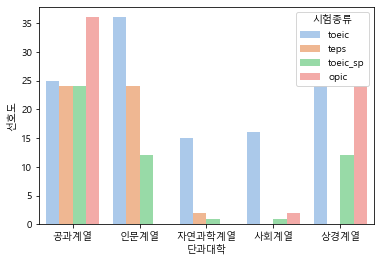

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 지정
plt.rc('font', family = "Malgun Gothic")
sns.set_palette("pastel")
sns.barplot(x='단과대학', y='선호도',hue='시험종류',data=aa)

## 카이제곱 검정

In [8]:
### 검정 하기
result = stats.chi2_contingency(gdf)
print("검정결과 = ", result)
print("검정 통계량 = %.3f,  p-value = %.3f" % (result[0], result[1]))

# (해석 - 검증결과)
#  1. p-value=0.778 > 0.05 이므로, 귀무가설 채택
#  2. 귀무가설 채택 : 단과대별로 선호하는 어학시험에는 차이가 없다
#                   : 동질이다

검정결과 =  (90.97939432759698, 3.189869785330676e-14, 12, array([[45.48201439,  7.92805755, 25.03597122, 30.04316547,  7.51079137],
       [19.60431655,  3.41726619, 10.79136691, 12.94964029,  3.23741007],
       [19.60431655,  3.41726619, 10.79136691, 12.94964029,  3.23741007],
       [24.30935252,  4.23741007, 13.38129496, 16.05755396,  4.01438849]]))
검정 통계량 = 90.979,  p-value = 0.000


## 독립 두 집단 t-test

In [9]:
tdf = pd.read_csv('./test.csv',encoding='euc-kr')
tdf

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,여,INFJ,800,0,0,800,0,학원,자연과학계열,1
214,215,남,ENTP,800,0,0,0,950,독학,사회계열,1
215,216,남,ENTP,800,0,0,0,850,독학,사회계열,0
216,217,여,INFJ,800,0,700,0,0,학원,자연과학계열,1


In [10]:
# t검정을 활용해서 순위매기기(토익)
df_test = tdf['toeic'] # 토익에 대해서만 체크
df_total_toeic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['major'] == q[i]]
    r = df_test[tdf['major'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic = pd.concat([df_total_toeic, df_temp])
df_total_toeic

,비교대상,검정통계량,p-value
0,공과계열 vs 인문계열,2.318900,0.022107
0,공과계열 vs 자연과학계열,3.401055,0.001067
0,공과계열 vs 사회계열,3.105824,0.002645
0,공과계열 vs 상경계열,0.297246,0.766797
0,인문계열 vs 자연과학계열,1.665712,0.099888
0,인문계열 vs 사회계열,1.322364,0.189961
0,인문계열 vs 상경계열,1.915406,0.057861
0,자연과학계열 vs 사회계열,0.414862,0.680775
0,자연과학계열 vs 상경계열,2.937797,0.004374
0,사회계열 vs 상경계열,2.654996,0.009633


In [11]:
# t검정을 활용해서 순위매기기(텝스)
df_test = tdf['teps'] # 토익에 대해서만 체크
df_total_teps = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['major'] == q[i]]
    r = df_test[tdf['major'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_teps = pd.concat([df_total_teps, df_temp])
df_total_teps

,비교대상,검정통계량,p-value
0,공과계열 vs 인문계열,0.251465,8.018884e-01
0,공과계열 vs 자연과학계열,2.291709,2.465623e-02
0,공과계열 vs 사회계열,3.409557,1.032800e-03
0,공과계열 vs 상경계열,6.085206,1.458560e-08
0,인문계열 vs 자연과학계열,2.275552,2.569106e-02
0,인문계열 vs 사회계열,3.496488,7.859035e-04
0,인문계열 vs 상경계열,6.240931,7.056694e-09
0,자연과학계열 vs 사회계열,1.497718,1.431717e-01
0,자연과학계열 vs 상경계열,2.701191,8.515282e-03
0,사회계열 vs 상경계열,NaN,NaN


In [12]:
# t검정을 활용해서 순위매기기(토익스피킹)
df_test = tdf['toeic_sp'] # 토익에 대해서만 체크
df_total_toeic_sp = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['major'] == q[i]]
    r = df_test[tdf['major'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic_sp = pd.concat([df_total_toeic_sp, df_temp])
df_total_toeic_sp

,비교대상,검정통계량,p-value
0,공과계열 vs 인문계열,2.105254,0.037372
0,공과계열 vs 자연과학계열,2.675130,0.009121
0,공과계열 vs 사회계열,2.820719,0.006074
0,공과계열 vs 상경계열,2.337706,0.021073
0,인문계열 vs 자연과학계열,1.397385,0.166364
0,인문계열 vs 사회계열,1.512574,0.134482
0,인문계열 vs 상경계열,0.187178,0.851842
0,자연과학계열 vs 사회계열,0.083835,0.933666
0,자연과학계열 vs 상경계열,1.345376,0.182504
0,사회계열 vs 상경계열,1.464290,0.147186


In [13]:
# t검정을 활용해서 순위매기기(오픽)
df_test = tdf['opic'] # 토익에 대해서만 체크
df_total_opic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['major'] == q[i]]
    r = df_test[tdf['major'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_opic = pd.concat([df_total_opic, df_temp])
df_total_opic = df_total_opic.reset_index(drop=True)
df_total_opic

,비교대상,검정통계량,p-value
0,공과계열 vs 인문계열,9.209037,1.397454e-15
1,공과계열 vs 자연과학계열,5.021412,3.231629e-06
2,공과계열 vs 사회계열,3.898849,2.032849e-04
3,공과계열 vs 상경계열,2.321017,2.198800e-02
4,인문계열 vs 자연과학계열,NaN,NaN
5,인문계열 vs 사회계열,2.618486,1.063097e-02
6,인문계열 vs 상경계열,6.191529,8.943627e-09
7,자연과학계열 vs 사회계열,1.412902,1.665160e-01
8,자연과학계열 vs 상경계열,3.375729,1.162368e-03
9,사회계열 vs 상경계열,2.273278,2.579707e-02


In [14]:
def getDataFrame_FetchAll(df_total_opic):
    df_dict = df_total_opic.to_dict('list')
    list_row = []
    keys = df_dict.keys()
    for i in range(3):    
        for j in range(len(df_dict['비교대상'])) :
            dict_row = {}
            dict_row['비교대상'] = df_dict['비교대상'][j]
            dict_row['검정통계량']=df_dict['검정통계량'][j]
            dict_row['p-value']=df_dict['p-value'][j]
            #print(dict_row)
            list_row.append(dict_row)
    return list_row

In [15]:
list_row = []
df_dict = df_total_opic.to_dict('list')
keys = df_dict.keys()
for j in range(len(df_dict['비교대상'])) :
    dict_row = {}
    dict_row['비교대상'] = df_dict['비교대상'][j]
    dict_row['검정통계량']=df_dict['검정통계량'][j]
    dict_row['p-value']=df_dict['p-value'][j]
    #print(dict_row)
    list_row.append(dict_row)
list_row

[{'비교대상': '공과계열 vs 인문계열',
  '검정통계량': 9.20903680164442,
  'p-value': 1.3974542351791833e-15},
 {'비교대상': '공과계열 vs 자연과학계열',
  '검정통계량': 5.021412013657707,
  'p-value': 3.231628725379442e-06},
 {'비교대상': '공과계열 vs 사회계열',
  '검정통계량': 3.898849259868325,
  'p-value': 0.00020328487309645744},
 {'비교대상': '공과계열 vs 상경계열',
  '검정통계량': 2.3210173753311274,
  'p-value': 0.02198799626935137},
 {'비교대상': '인문계열 vs 자연과학계열', '검정통계량': nan, 'p-value': nan},
 {'비교대상': '인문계열 vs 사회계열',
  '검정통계량': 2.6184857379242343,
  'p-value': 0.01063097195227581},
 {'비교대상': '인문계열 vs 상경계열',
  '검정통계량': 6.191528517313852,
  'p-value': 8.943626613735123e-09},
 {'비교대상': '자연과학계열 vs 사회계열',
  '검정통계량': 1.4129024667002774,
  'p-value': 0.16651600447187642},
 {'비교대상': '자연과학계열 vs 상경계열',
  '검정통계량': 3.375729345463396,
  'p-value': 0.0011623678037436388},
 {'비교대상': '사회계열 vs 상경계열',
  '검정통계량': 2.273278306736364,
  'p-value': 0.025797069265327092}]

In [16]:
def getDictionary(df_total_opic):
    df_dict_rc = df_total_opic.to_dict('records')
    return df_dict_rc

In [17]:
def getDictio  nary(df):
    df_dict = df.to_dict('records')
    return df_dict